In [99]:
# Outliers to drop

In [153]:
companies[companies.exit_date > "2014"]

,id,normalized_name,category_code,founded_at,description,closed_at,status,exit,exit_date,country_code,...,top_50,top_5_bool,top_20_bool,top_50_bool,n_female_founders,female_ratio,mean_comp_founded_ever,mean_comp_founded_before,mean_comp_worked_before,target
796,c:2623,epals,web,1996-01-01,web Online Education Community ePals Corpora...,NaT,ipo,ipo,2020-09-08,USA,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


In [ ]:
# imputing


In [ ]:
# OHE
# does OHE work for nan values ? cause then you can juste use still the state codes

In [ ]:
# wondering if shouldn't do analysis just for silicon valley

In [148]:
# intution:
## companies founded arount 2000 had higher shares or acquisisitions and ipos
## higher share of companies with ipos if series a was around 2000
## higher rate of failure in Texas

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import pandas_profiling

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
from invesscience.joanna_merge_2 import get_training_data 

In [93]:
companies = get_training_data(reference="a")

        id  mean_comp_worked_before
0      c:1                     0.50
1   c:1001                     0.75
2  c:10015                     0.00
3   c:1003                     0.50
4  c:10054                     0.00
        id    normalized_name    category_code founded_at  \
0   c:1349      move networks         software        NaT   
1   c:4584        modern feed      games_video 2007-01-01   
2  c:16612  micron technology    semiconductor 1978-01-01   
3     c:28              cisco  network_hosting 1984-01-01   
4     c:29              yahoo              web 1994-01-01   

                                         description closed_at    status  \
0  software Move Networks is a streaming tech pla...       NaN  acquired   
1  games_video     [Modern Feed](http://www.moder...       NaN  acquired   
2  semiconductor   Semiconductor Applications Mic...       NaN       ipo   
3  network_hosting     Cisco designs and sells ha...       NaN       ipo   
4  web   News and On-line directory Y

In [7]:
companies.head()

,id,normalized_name,category_code,founded_at,description,closed_at,status,exit,exit_date,country_code,...,top_50,top_5_bool,top_20_bool,top_50_bool,n_female_founders,female_ratio,mean_comp_founded_ever,mean_comp_founded_before,mean_comp_worked_before,target
0,c:1349,move networks,software,NaT,software Move Networks is a streaming tech pla...,NaN,acquired,acquisition,1987-06-16 00:00:00,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,c:4584,modern feed,games_video,2007-01-01,games_video [Modern Feed](http://www.moder...,NaN,acquired,acquisition,1987-06-16 00:00:00,USA,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,c:16612,micron technology,semiconductor,1978-01-01,semiconductor Semiconductor Applications Mic...,NaN,ipo,ipo,1990-01-02 00:00:00,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,c:28,cisco,network_hosting,1984-01-01,network_hosting Cisco designs and sells ha...,NaN,ipo,ipo,1990-02-23 00:00:00,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,c:29,yahoo,web,1994-01-01,web News and On-line directory Yahoo was fou...,NaN,ipo,ipo,1996-04-12 00:00:00,USA,...,0.2,1.0,0.0,1.0,0.0,0.0,1.2,0.0,0.0,1


In [45]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241 entries, 779 to 3213
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         3241 non-null   object        
 1   normalized_name            3241 non-null   object        
 2   category_code              3115 non-null   object        
 3   founded_at                 2642 non-null   datetime64[ns]
 4   description                3239 non-null   object        
 5   closed_at                  360 non-null    object        
 6   status                     3241 non-null   object        
 7   exit                       3241 non-null   object        
 8   exit_date                  797 non-null    object        
 9   country_code               3118 non-null   object        
 10  state_code                 2241 non-null   object        
 11  date_series_a              3241 non-null   datetime64[ns]
 12  part

In [9]:
companies.columns

Index(['id', 'normalized_name', 'category_code', 'founded_at', 'description',
       'closed_at', 'status', 'exit', 'exit_date', 'country_code',
       'state_code', 'date_series_a', 'participants_a', 'raised_amount_usd_a',
       'timediff_founded_series_a', 'rounds_before_a', 'raised_before_a',
       'participants_before_a', 'phd', 'MBA', 'cs', 'graduate', 'undergrad',
       'professional', 'degree_count', 'MBA_bool', 'cs_bool', 'phd_bool',
       'founder_count', 'top_5', 'top_20', 'top_50', 'top_5_bool',
       'top_20_bool', 'top_50_bool', 'n_female_founders', 'female_ratio',
       'mean_comp_founded_ever', 'mean_comp_founded_before',
       'mean_comp_worked_before', 'target'],
      dtype='object')

In [59]:
companies.describe()

,participants_a,raised_amount_usd_a,timediff_founded_series_a,rounds_before_a,raised_before_a,participants_before_a,phd,MBA,cs,graduate,...,top_50,top_5_bool,top_20_bool,top_50_bool,n_female_founders,female_ratio,mean_comp_founded_ever,mean_comp_founded_before,mean_comp_worked_before,target
count,3241.000000,3.241000e+03,2642.000000,3241.000000,3.165000e+03,3138.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1558.000000,1558.000000,1600.000000,1600.00000,1599.000000,3241.000000
mean,1.804690,6.457364e+06,2.515884,0.136069,2.341804e+05,0.203314,0.064089,0.115167,0.140729,0.175931,...,0.062000,0.171250,0.093750,0.096875,0.078947,0.042908,1.063940,0.03193,0.110255,0.247763
std,1.504865,1.459416e+07,3.710009,0.384496,2.341051e+06,0.909744,0.227481,0.283128,0.302385,0.360518,...,0.210467,0.376845,0.291572,0.295880,0.313770,0.174852,0.228445,0.14861,0.321650,0.431780
min,0.000000,0.000000e+00,-35.247815,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,1.000000,1.600000e+06,0.668049,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,3.956128e+06,1.527752,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,2.000000,7.000000e+06,3.249896,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,18.000000,4.000000e+08,60.086107,4.000000,1.000000e+08,21.000000,2.000000,2.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,3.000000,1.50000,4.000000,1.000000


# Exploration

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

## Category code

In [31]:
companies = companies.sort_values(by="category_code")

In [38]:
# More cleantech and social in the ipos

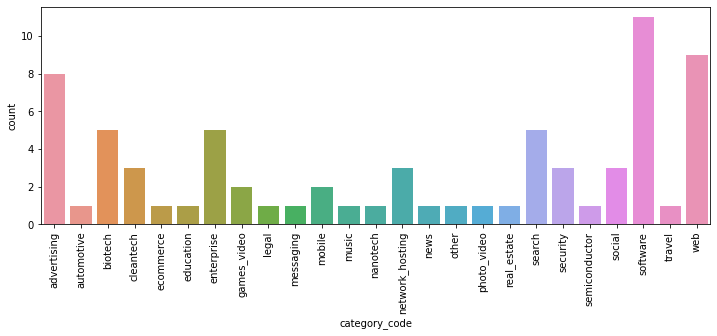

In [30]:
plt.figure(figsize=(12,4))
sns.countplot(x="category_code",data = companies[companies.exit=="ipo"])
plt.xticks(rotation=90)
plt.show()

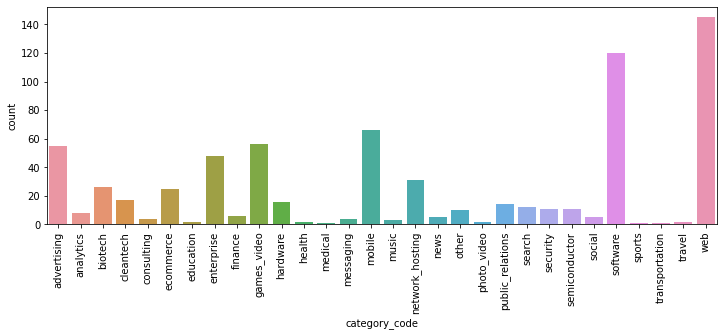

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(x="category_code",data = companies[companies.exit=="acquisition"])
plt.xticks(rotation=90)
plt.show()

In [37]:
# more biotech in no exit because take long time to develop

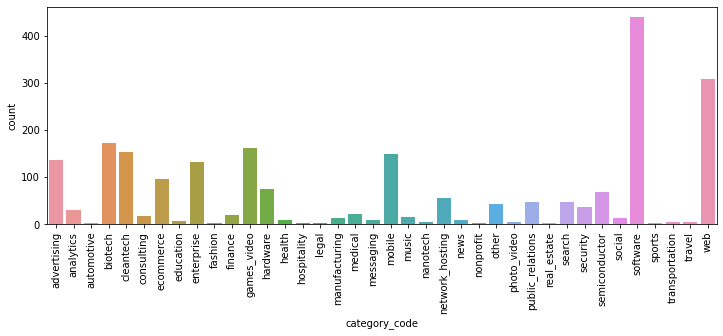

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(x="category_code",data = companies[companies.exit=="no exit"])
plt.xticks(rotation=90)
plt.show()

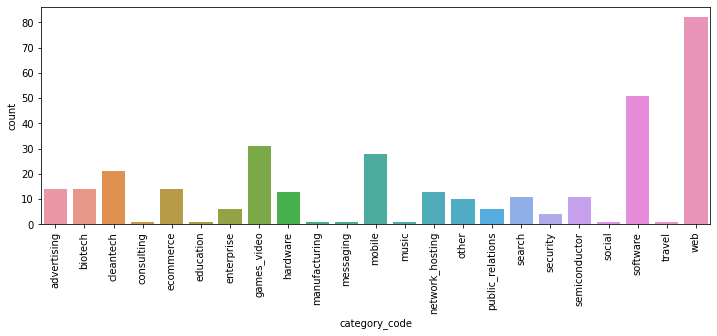

In [34]:
plt.figure(figsize=(12,4))
sns.countplot(x="category_code",data = companies[companies.status=="closed"].sort_values(by="category_code"))
plt.xticks(rotation=90)
plt.show()

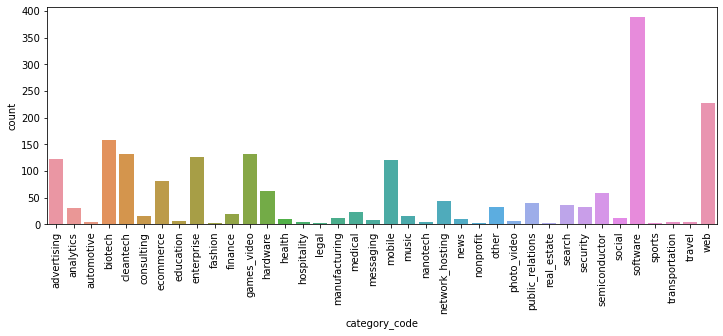

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x="category_code",data = companies[companies.status=="operating"].sort_values(by="category_code"))
plt.xticks(rotation=90)
plt.show()

In [184]:
pivot_categories = pd.pivot_table(companies, values='id', index=["category_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_categories = pivot_categories.fillna(0).sort_values(by = "All", ascending=False)
pivot_categories.acquisition = pivot_categories.acquisition/pivot_categories.All
pivot_categories.ipo = pivot_categories.ipo/pivot_categories.All
pivot_categories["no exit"] = pivot_categories["no exit"]/pivot_categories.All

In [185]:
pivot_categories

exit,acquisition,ipo,no exit,All
category_code,,,,
All,0.227608,0.023114,0.749278,3115
software,0.210526,0.019298,0.770175,570
web,0.313175,0.019438,0.667387,463
games_video,0.254545,0.009091,0.736364,220
mobile,0.304147,0.009217,0.686636,217
biotech,0.128079,0.024631,0.847291,203
advertising,0.276382,0.040201,0.683417,199
enterprise,0.259459,0.027027,0.713514,185
cleantech,0.098266,0.017341,0.884393,173


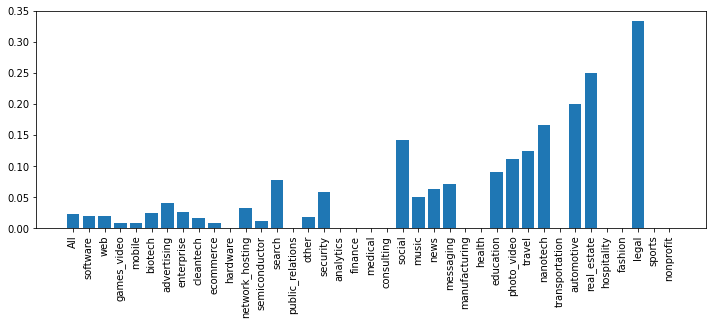

In [187]:
plt.figure(figsize=(12,4))
plt.bar(pivot_categories.index,height=pivot_categories["ipo"])
plt.xticks(rotation=90)
plt.show()

In [192]:
# Conclusion : search, social, security = predictor of ipo
# hardware, analytics, finance, medical = no ipo

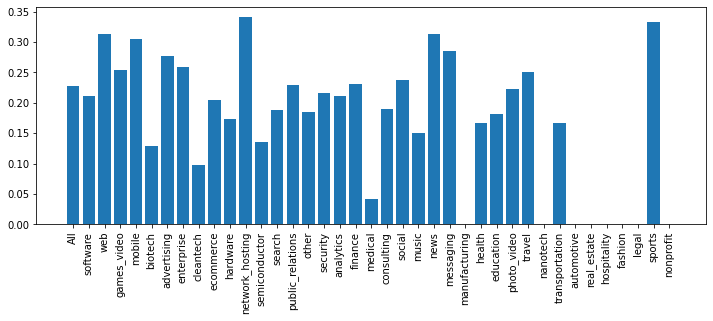

In [189]:
plt.figure(figsize=(12,4))
plt.bar(pivot_categories.index,height=pivot_categories["acquisition"])
plt.xticks(rotation=90)
plt.show()

In [194]:
# Conclusion : web, mobile, advertising, network hosting = predictor of acquisition
# biotech, cleantech, semiconductor, medical = no acquisition

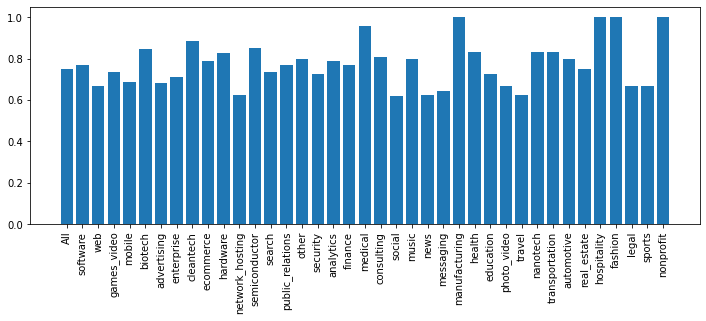

In [191]:
plt.figure(figsize=(12,4))
plt.bar(pivot_categories.index,height=pivot_categories["no exit"])
plt.xticks(rotation=90)
plt.show()

In [195]:
# Conclusion : medical = predictor of no exit
# network hosting & social = exit

In [198]:
pivot_categories = pd.pivot_table(companies, values='id', index=["category_code"],
                    columns=['status'], aggfunc= "count", margins = True)
pivot_categories = pivot_categories.fillna(0).sort_values(by = "All", ascending=False)[["closed","All"]]
pivot_categories.closed = pivot_categories.closed/pivot_categories.All

In [200]:
pivot_categories.head()

status,closed,All
category_code,,
All,0.107865,3115
software,0.089474,570
web,0.177106,463
games_video,0.140909,220
mobile,0.129032,217


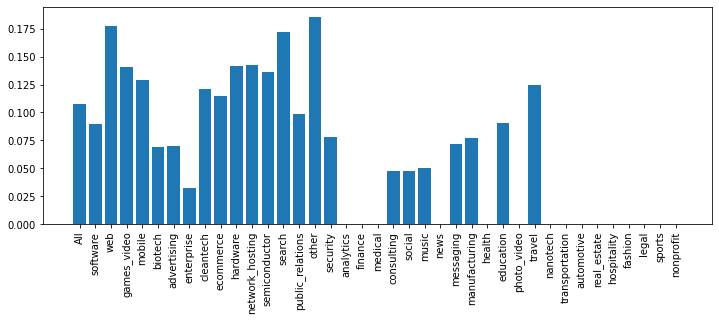

In [199]:
plt.figure(figsize=(12,4))
plt.bar(pivot_categories.index,height=pivot_categories["closed"])
plt.xticks(rotation=90)
plt.show()

In [201]:
# conclusion: web & search predictor of failure 
# enterprise mobile biotech predictor of no failure

## Founded at

In [78]:
# some companies received funding before being founded, maybe bad entries in DB or 
#just not registered before first round

/Users/joannavitiello/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joannavitiello/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


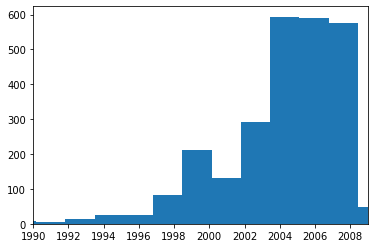

In [137]:
plt.hist(companies.founded_at.values, bins=40)
plt.xlim("1990","2009")
plt.show()

In [141]:
# the companies founded around 2000 actually performed better

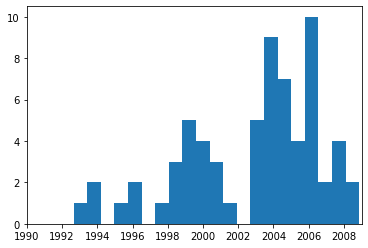

In [138]:
plt.hist(companies[companies.exit=="ipo"].founded_at.values, bins=40)
plt.xlim("1990","2009")
plt.show()

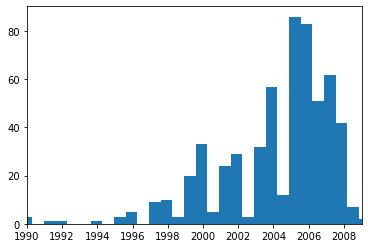

In [139]:
plt.hist(companies[companies.exit=="acquisition"].founded_at.values, bins=40)
plt.xlim("1990","2009")
plt.show()

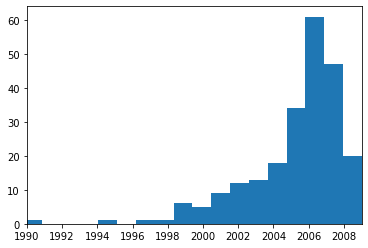

In [140]:
plt.hist(companies[companies.status=="closed"].founded_at.values, bins=40)
plt.xlim("1990","2009")
plt.show()

In [60]:
max(companies.founded_at)

Timestamp('2013-06-01 00:00:00')

In [203]:
companies["founded_year"] = companies.founded_at.dt.strftime('%Y')

In [213]:
pivot_founded = pd.pivot_table(companies, values='id', index=["founded_year"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_founded = pivot_founded.fillna(0).sort_values(by = "All", ascending=False)
pivot_founded.acquisition = pivot_founded.acquisition/pivot_founded.All
pivot_founded.ipo = pivot_founded.ipo/pivot_founded.All
pivot_founded["no exit"] = pivot_founded["no exit"]/pivot_founded.All
pivot_founded

exit,acquisition,ipo,no exit,All
founded_year,,,,
All,0.224830,0.025738,0.749432,2642
2006,0.252083,0.022917,0.725000,480
2005,0.247596,0.024038,0.728365,416
2007,0.181592,0.007463,0.810945,402
2004,0.227891,0.027211,0.744898,294
2003,0.197861,0.037433,0.764706,187
2008,0.192547,0.024845,0.782609,161
2002,0.218978,0.000000,0.781022,137
2000,0.267176,0.015267,0.717557,131


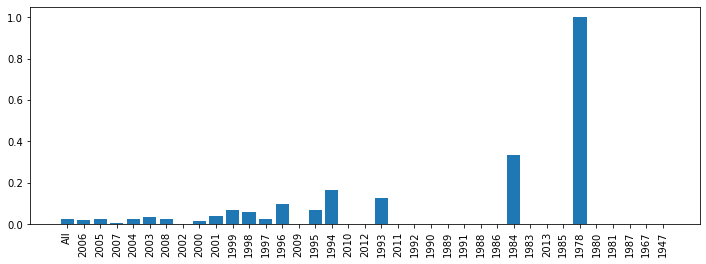

In [214]:
plt.figure(figsize=(12,4))
plt.bar(pivot_founded.index,height=pivot_founded["ipo"])
plt.xticks(rotation=90)
plt.show()

In [216]:
# 1994 - 1996 & 1998-1999 more chances of ipo
# 2002 & 2007 less chances of ipo

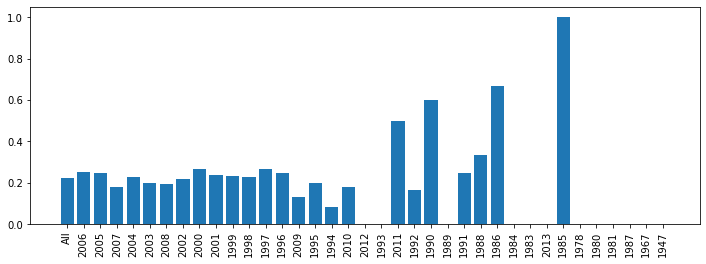

In [217]:
plt.figure(figsize=(12,4))
plt.bar(pivot_founded.index,height=pivot_founded["acquisition"])
plt.xticks(rotation=90)
plt.show()

In [218]:
#2007 - less chances of acquisition

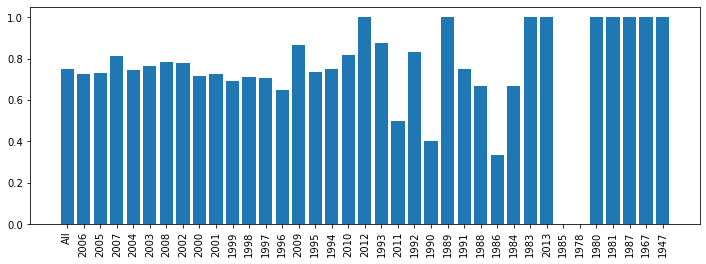

In [219]:
plt.figure(figsize=(12,4))
plt.bar(pivot_founded.index,height=pivot_founded["no exit"])
plt.xticks(rotation=90)
plt.show()

In [220]:
# 1996-1999 more chances of exit
# 2007 less chances of exit

# DateDiff

In [ ]:
# To do

# Closed at

/Users/joannavitiello/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joannavitiello/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


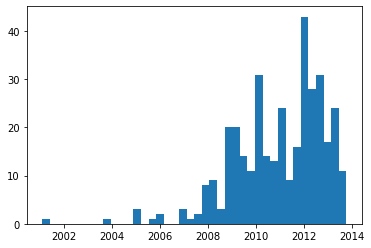

In [95]:
companies.closed_at = pd.to_datetime(companies.closed_at)
plt.hist(companies.closed_at.values, bins=40)
plt.show()

In [88]:
# see some clear spikes

# Exit Date

/Users/joannavitiello/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joannavitiello/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


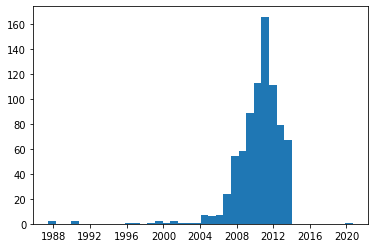

In [96]:
companies.exit_date = pd.to_datetime(companies.exit_date)
plt.hist(companies.exit_date.values, bins=40)
plt.show()

In [98]:
companies[companies.exit_date > "2014"]

,id,normalized_name,category_code,founded_at,description,closed_at,status,exit,exit_date,country_code,...,top_50,top_5_bool,top_20_bool,top_50_bool,n_female_founders,female_ratio,mean_comp_founded_ever,mean_comp_founded_before,mean_comp_worked_before,target
796,c:2623,epals,web,1996-01-01,web Online Education Community ePals Corpora...,NaT,ipo,ipo,2020-09-08,USA,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


# Date Series A

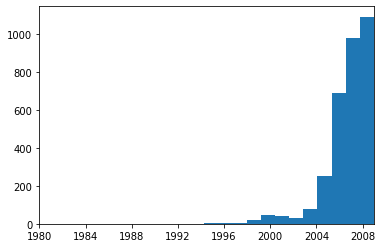

In [136]:
companies.date_series_a = pd.to_datetime(companies.date_series_a)
plt.hist(companies.date_series_a.values, bins=40)
plt.xlim("1980","2009")
plt.show()

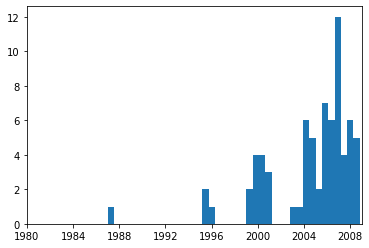

In [145]:
plt.hist(companies[companies.exit=="ipo"].date_series_a.values, bins=40)
plt.xlim("1980","2009")
plt.show()

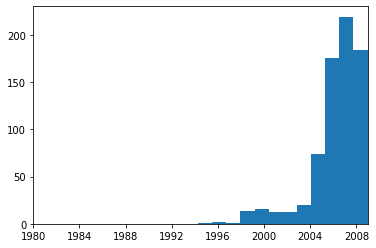

In [147]:
plt.hist(companies[companies.exit=="acquisition"].date_series_a.values, bins=40)
plt.xlim("1980","2009")
plt.show()

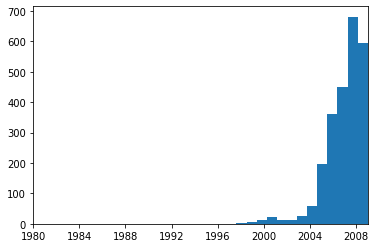

In [149]:
plt.hist(companies[companies.exit=="no exit"].date_series_a.values, bins=40)
plt.xlim("1980","2009")
plt.show()

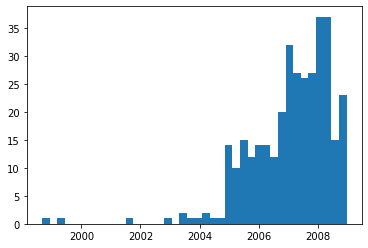

In [150]:
plt.hist(companies[companies.status=="closed"].date_series_a.values, bins=40)
plt.show()

# Country Code

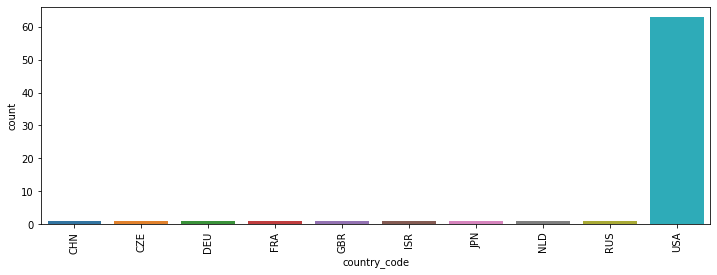

In [106]:
plt.figure(figsize=(12,4))
sns.countplot(x="country_code",data = companies[companies.exit=="ipo"].sort_values(by="country_code"))
plt.xticks(rotation=90)
plt.show()

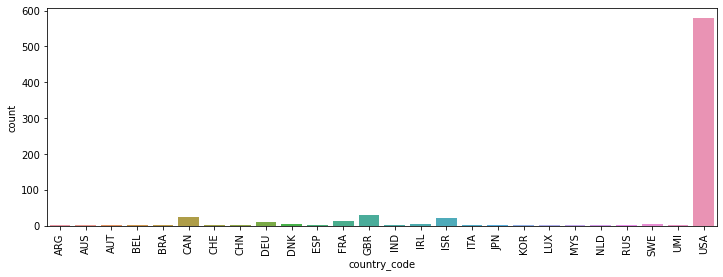

In [105]:
plt.figure(figsize=(12,4))
sns.countplot(x="country_code",data = companies[companies.exit=="acquisition"].sort_values(by="country_code"))
plt.xticks(rotation=90)
plt.show()

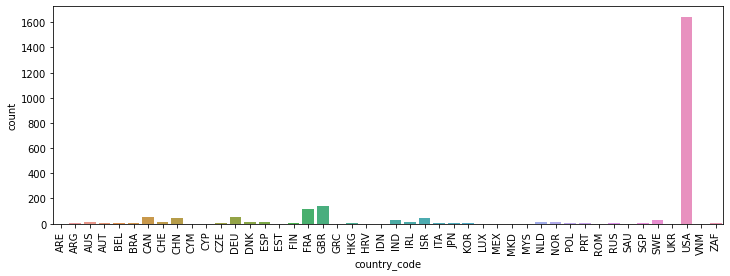

In [107]:
plt.figure(figsize=(12,4))
sns.countplot(x="country_code",data = companies[companies.exit=="no exit"].sort_values(by="country_code"))
plt.xticks(rotation=90)
plt.show()

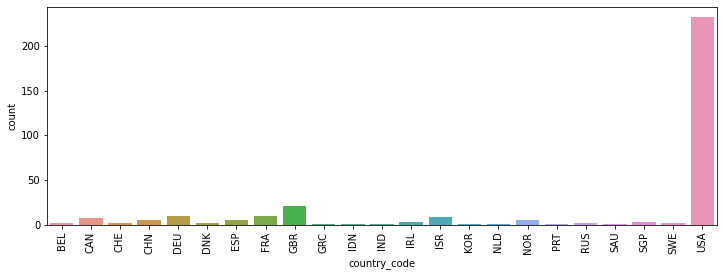

In [108]:
plt.figure(figsize=(12,4))
sns.countplot(x="country_code",data = companies[companies.status=="closed"].sort_values(by="country_code"))
plt.xticks(rotation=90)
plt.show()

In [164]:
pivot_countries = pd.pivot_table(companies, values='id', index=["country_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_countries = pivot_countries.fillna(0).sort_values(by = "All", ascending=False)
pivot_countries.acquisition = pivot_countries.acquisition/pivot_countries.All
pivot_countries.ipo = pivot_countries.ipo/pivot_countries.All
pivot_countries["no exit"] = pivot_countries["no exit"]/pivot_countries.All

In [177]:
pivot_countries

exit,acquisition,ipo,no exit,All
country_code,,,,
All,0.226748,0.023092,0.750160,3118
USA,0.252843,0.027559,0.719598,2286
GBR,0.174419,0.005814,0.819767,172
FRA,0.095238,0.007937,0.896825,126
CAN,0.320000,0.000000,0.680000,75
ISR,0.289855,0.014493,0.695652,69
DEU,0.161765,0.014706,0.823529,68
CHN,0.044444,0.022222,0.933333,45
SWE,0.096774,0.000000,0.903226,31


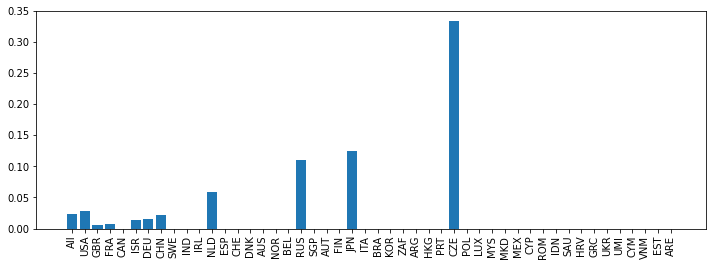

In [176]:
plt.figure(figsize=(12,4))
plt.bar(pivot_countries.index,height=pivot_countries["ipo"])
plt.xticks(rotation=90)
plt.show()

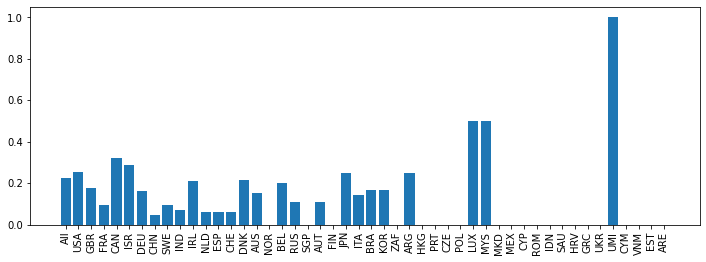

In [178]:
plt.figure(figsize=(12,4))
plt.bar(pivot_countries.index,height=pivot_countries["acquisition"])
plt.xticks(rotation=90)
plt.show()

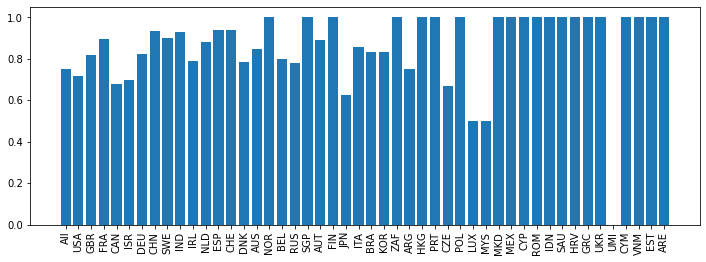

In [179]:
plt.figure(figsize=(12,4))
plt.bar(pivot_countries.index,height=pivot_countries["no exit"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.bar(pivot_countries.index,height=pivot_countries["acquisition"])
plt.xticks(rotation=90)
plt.show()

# State Code

In [111]:
companies[companies.country_code == "USA"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 3238
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         2286 non-null   object        
 1   normalized_name            2286 non-null   object        
 2   category_code              2221 non-null   object        
 3   founded_at                 1900 non-null   datetime64[ns]
 4   description                2286 non-null   object        
 5   closed_at                  242 non-null    datetime64[ns]
 6   status                     2286 non-null   object        
 7   exit                       2286 non-null   object        
 8   exit_date                  638 non-null    datetime64[ns]
 9   country_code               2286 non-null   object        
 10  state_code                 2235 non-null   object        
 11  date_series_a              2286 non-null   datetime64[ns]
 12  partic

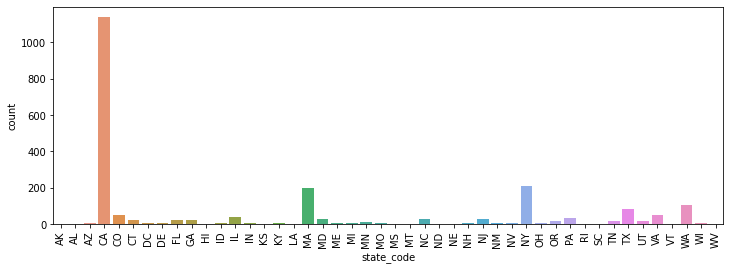

In [152]:
plt.figure(figsize=(12,4))
sns.countplot(x="state_code",data = companies.sort_values(by="state_code"))
plt.xticks(rotation=90)
plt.show()

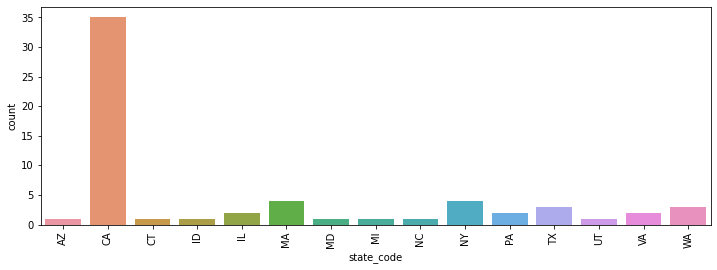

In [113]:
plt.figure(figsize=(12,4))
sns.countplot(x="state_code",data = companies[companies.exit=="ipo"].sort_values(by="state_code"))
plt.xticks(rotation=90)
plt.show()

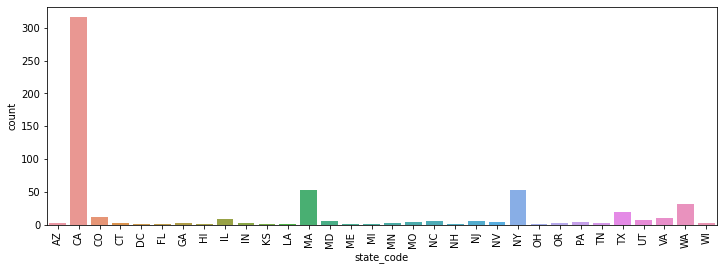

In [114]:
plt.figure(figsize=(12,4))
sns.countplot(x="state_code",data = companies[companies.exit=="acquisition"].sort_values(by="state_code"))
plt.xticks(rotation=90)
plt.show()

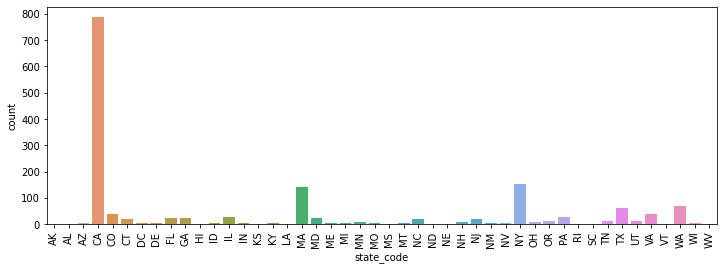

In [118]:
plt.figure(figsize=(12,4))
sns.countplot(x="state_code",data = companies[companies.exit=="no exit"].sort_values(by="state_code"))
plt.xticks(rotation=90)
plt.show()

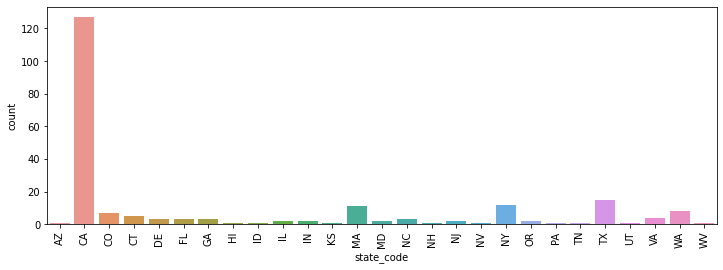

In [112]:
plt.figure(figsize=(12,4))
sns.countplot(x="state_code",data = companies[companies.status=="closed"].sort_values(by="state_code"))
plt.xticks(rotation=90)
plt.show()

In [115]:
# more companies that failed in Texas proportionally

In [116]:
# overrepresentation everywhere of CA (MA, NY)

In [224]:
pivot_states = pd.pivot_table(companies, values='id', index=["state_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_states = pivot_states.fillna(0).sort_values(by = "All", ascending=False)
pivot_states.acquisition = pivot_states.acquisition/pivot_states.All
pivot_states.ipo = pivot_states.ipo/pivot_states.All
pivot_states["no exit"] = pivot_states["no exit"]/pivot_states.All

In [225]:
pivot_states

exit,acquisition,ipo,no exit,All
state_code,,,,
All,0.251673,0.027666,0.720660,2241
CA,0.277436,0.030729,0.691835,1139
NY,0.247619,0.019048,0.733333,210
MA,0.267677,0.020202,0.712121,198
WA,0.307692,0.028846,0.663462,104
TX,0.231707,0.036585,0.731707,82
CO,0.215686,0.000000,0.784314,51
VA,0.204082,0.040816,0.755102,49
IL,0.230769,0.051282,0.717949,39


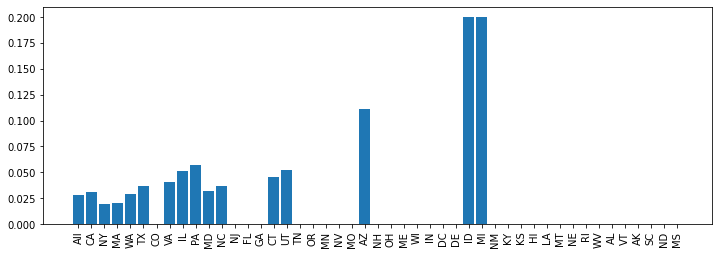

In [226]:
plt.figure(figsize=(12,4))
plt.bar(pivot_states.index,height=pivot_states["ipo"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# NY & MA less ipo than average
# IL, PA more than average 

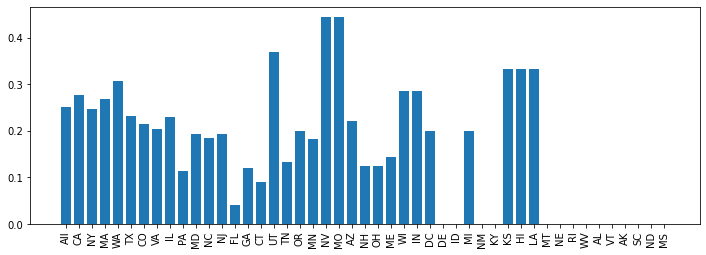

In [228]:
plt.figure(figsize=(12,4))
plt.bar(pivot_states.index,height=pivot_states["acquisition"])
plt.xticks(rotation=90)
plt.show()

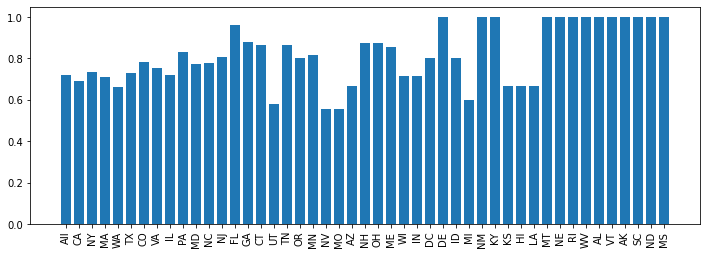

In [229]:
plt.figure(figsize=(12,4))
plt.bar(pivot_states.index,height=pivot_states["no exit"])
plt.xticks(rotation=90)
plt.show()

# Investors (Participants)

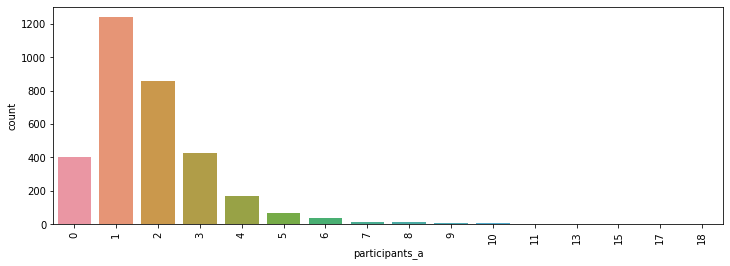

In [151]:
plt.figure(figsize=(12,4))
sns.countplot(x="participants_a",data = companies)
plt.xticks(rotation=90)
plt.show()

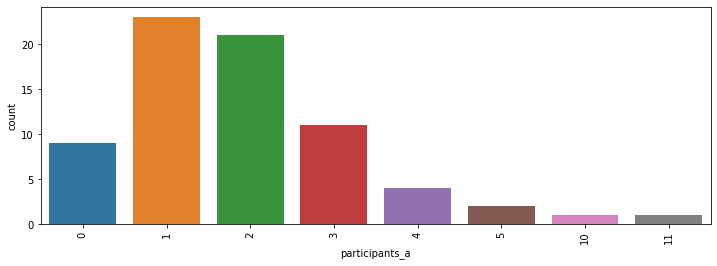

In [154]:
plt.figure(figsize=(12,4))
sns.countplot(x="participants_a",data = companies[companies.exit=="ipo"])
plt.xticks(rotation=90)
plt.show()

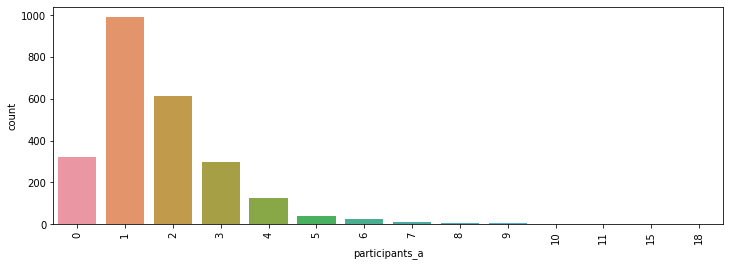

In [180]:
plt.figure(figsize=(12,4))
sns.countplot(x="participants_a",data = companies[companies.exit=="no exit"])
plt.xticks(rotation=90)
plt.show()